#### Question 6

In [29]:
import numpy as np
from sklearn.linear_model import LassoCV, Lasso

## read mystery.dat
data = np.loadtxt('mystery.dat', delimiter=',')
x = data[:, :-1]
y = data[:, -1]

## normalize x based on maximum value in all x data
x_norm = x / np.max(np.max(X, axis=0), axis=0)

## find best alpha using LassoCV
## test 100 alphas ranging from 1e-4 to 1e4
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso_cv.fit(x_norm, y)
alpha_best = lasso_cv.alpha_
print(f"best alpha: {alpha_best}")

## fit Lasso model with best alpha
lasso = Lasso(alpha=alpha_best)
lasso.fit(x_norm, y)

## get absolute value of lasso coefficients
coefs = np.abs(lasso.coef_)

## get indices of the 10 largest coefficients
## note: that the coefficients are sorted in descending order
indices = np.argsort(coefs)[::-1][:10]

## print the indices (coordinate number) of the 10 largest coefficients
print("indices of the 10 largest coefficients:")
for i in indices:
    print(f"coordinate number: {i}, coefficient: {coefs[i]}")


best alpha: 0.026560877829466867
indices of the 10 largest coefficients:
coordinate number: 4, coefficient: 4.7131842771824
coordinate number: 6, coefficient: 4.705164100703595
coordinate number: 1, coefficient: 4.310931741925735
coordinate number: 22, coefficient: 4.286751680551222
coordinate number: 10, coefficient: 4.002280617715773
coordinate number: 26, coefficient: 3.9016126507383193
coordinate number: 2, coefficient: 3.7254083754072687
coordinate number: 12, coefficient: 3.703791161879716
coordinate number: 18, coefficient: 3.3730434729455077
coordinate number: 16, coefficient: 3.2806820617254204


In [18]:
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import os

# Load the data
data = np.loadtxt('mystery.dat', delimiter=',')

# Extract features (X) and target (y)
X = data[:, :-1]  # All columns except the last one
y = data[:, -1]   # Last column

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

xx =  os.popen('cat mystery.dat').read().split('\n')[:-1]
print(len(xx))
## print the maximum values of X
max_values = np.max(np.max(X, axis=0), axis=0)
print("Maximum values of X:", max_values)
X_norm = X / max_values
norm_max_vals = np.max(X_norm, axis=0)
#print("Norm of X:", X_norm)
print("Maximum values of X:", max_values)
print("Norm of maximum values of X:", norm_max_vals)

Shape of X: (101, 100)
Shape of y: (101,)
101
Maximum values of X: 4.61235
Maximum values of X: 4.61235
Norm of maximum values of X: [0.55260334 0.56184808 0.62308368 0.4434464  0.55962796 0.56491593
 0.56053205 0.42879226 0.56276735 0.50903119 0.53437619 0.66698971
 0.44776524 0.63253222 0.69820374 0.54617928 0.61864776 0.51881362
 0.47540625 0.70945397 0.39601288 0.41351805 0.39640314 0.45497848
 0.65678667 0.47583336 0.52085163 0.55828374 0.48284714 0.60815419
 0.40373996 0.43489328 0.5040836  0.46082583 0.62957061 0.68255878
 0.67666157 0.62091125 0.54197101 0.59865361 0.55643002 0.4825371
 0.48693833 0.59131029 0.57342136 0.54949212 0.41915726 0.97611413
 0.55841816 0.56671545 0.6819192  0.66509263 0.63592312 0.39122356
 0.52601169 0.61769163 0.54242848 0.53017009 0.4816742  1.
 0.66634145 0.4827886  0.40981712 0.4838553  0.35103147 0.59567466
 0.5590946  0.39521936 0.7903238  0.44779559 0.52321051 0.56871443
 0.39681724 0.92512277 0.56047568 0.52114215 0.64399059 0.47484688
 0.65

In [3]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_

# Identify the indices of the top 10 features with the largest absolute coefficients
top_features = np.argsort(np.abs(coefficients))[-10:][::-1]

# Output the top 10 feature indices (1-based index)
top_features_1_based = top_features + 1

print("Top 10 relevant features (1-based index):", top_features_1_based)

Top 10 relevant features (1-based index): [58 27 11 21 68  2 24 44 34 71]


In [19]:
from sklearn.linear_model import Lasso, LassoCV

# Create and fit a Lasso model
# Alpha parameter controls regularization strength - may need tuning
def lasso_tuning(X, y):
    alphas = np.logspace(-4, 0, 10)
    lasso_cv = LassoCV(alphas=alphas, cv=5,random_state=33)
    lasso_cv.fit(X, y)
    print(lasso_cv.alpha_)
    return lasso_cv.alpha_

best_a = lasso_tuning(X_norm, y)
    #return alphas, scores
lasso = Lasso(alpha=best_a)
lasso.fit(X_norm, y)

# Identify non-zero coefficients
important_feature_indices = np.where(lasso.coef_ != 0)[0]
print(f"Important features found: {important_feature_indices}")

# top 10 non 0 coefficients
top_10_non_zero = np.argsort(np.abs(lasso.coef_))[-10:][::-1]
print(f"Top 10 non-zero coefficients: {top_10_non_zero}")
# Output the indices of the important features (1-based index)
important_feature_indices_1_based = important_feature_indices + 1
print("Important features (1-based index):", important_feature_indices_1_based)

# You may want to examine the coefficient values
print(f"Their coefficients: {lasso.coef_[important_feature_indices]}")

0.016681005372000592
Important features found: [ 0  1  2  3  4  5  6 10 12 16 18 22 25 26 28 33 34 35 42 45 48 54 59 63
 64 69 81 87 88 95 99]
Top 10 non-zero coefficients: [ 4  6 22  1 10 26 12  2 18 16]
Important features (1-based index): [  1   2   3   4   5   6   7  11  13  17  19  23  26  27  29  34  35  36
  43  46  49  55  60  64  65  70  82  88  89  96 100]
Their coefficients: [-0.29315727  4.40146644  3.91115763  0.06328737  4.85279454  0.17958635
  4.80905896  4.21501227  3.96421089  3.53835767  3.5867669   4.45935997
 -0.11809766  3.97907513  0.03165923 -0.11025741  0.24708276 -0.56018825
 -0.22690594 -0.25442702  0.05481841 -0.48753236 -0.40403791  0.06143649
 -0.04453973  0.10135636  0.09201587  0.1818956   0.26809623 -0.09625738
  0.30903861]


/home/scotty/ucsd/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e-01, tolerance: 9.660e-02
  model = cd_fast.enet_coordinate_descent(
/home/scotty/ucsd/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e-01, tolerance: 9.660e-02
  model = cd_fast.enet_coordinate_descent(


Number of selected features: 10
Relevant features (1-indexed):
[ 2  3  5  7 11 13 17 19 23 27]

Coefficients of relevant features:
Feature 2: 0.661828
Feature 3: 0.642267
Feature 5: 0.680703
Feature 7: 0.834529
Feature 11: 0.601232
Feature 13: 0.449341
Feature 17: 0.307075
Feature 19: 0.453303
Feature 23: 0.756804
Feature 27: 0.616330

Model Performance:
Mean Squared Error: 2.2621
R² Score: 0.8073

Cross-validation MSE: 3.2962 ± 1.2244


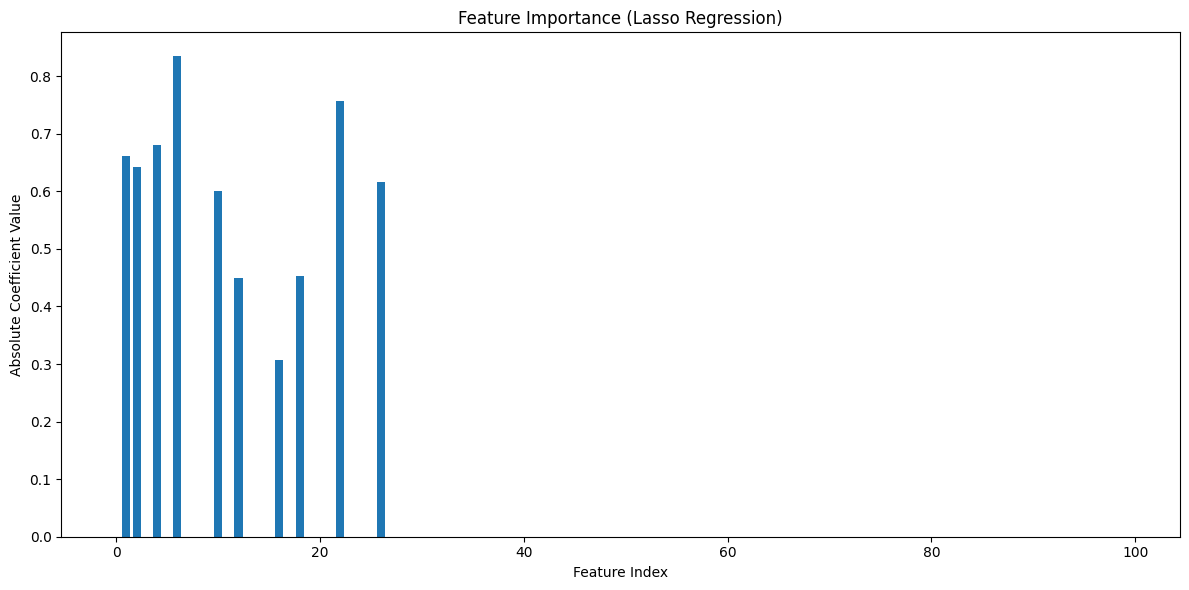

In [1]:
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Load the data
data = np.loadtxt('mystery.dat', delimiter=',')

# Extract features (X) and target (y)
X = data[:, :-1]  # All columns except the last one
y = data[:, -1]   # Last column

# Normalize features for better convergence
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Apply Lasso regression with alpha tuned to select approximately 10 features
# We'll try different alpha values to find one that gives us exactly 10 non-zero coefficients
alphas = np.logspace(-5, 0, 100)
n_features_selected = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000, tol=1e-4)
    lasso.fit(X_normalized, y)
    n_features_selected.append(np.sum(lasso.coef_ != 0))

# Find the alpha that gives us closest to 10 features
best_alpha_idx = np.argmin(np.abs(np.array(n_features_selected) - 10))
best_alpha = alphas[best_alpha_idx]

# Fit the model with the best alpha
lasso = Lasso(alpha=best_alpha, max_iter=10000, tol=1e-4)
lasso.fit(X_normalized, y)

# Get the indices of the non-zero coefficients (relevant features)
relevant_features = np.where(lasso.coef_ != 0)[0]

# Print the number of selected features
print(f"Number of selected features: {len(relevant_features)}")

# Print the indices of the relevant features (adding 1 to convert to 1-indexed)
print("Relevant features (1-indexed):")
print(relevant_features + 1)

# Print the coefficients of the relevant features
print("\nCoefficients of relevant features:")
for i, idx in enumerate(relevant_features):
    print(f"Feature {idx+1}: {lasso.coef_[idx]:.6f}")

# Plot the absolute coefficients to visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(lasso.coef_)), np.abs(lasso.coef_))
plt.xlabel('Feature Index')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance (Lasso Regression)')
plt.tight_layout()
plt.savefig('feature_importance.png')

# Verify the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Predictions using only the selected features
X_selected = X_normalized[:, relevant_features]
lasso_selected = Lasso(alpha=best_alpha, max_iter=10000, tol=1e-4)
lasso_selected.fit(X_selected, y)
y_pred = lasso_selected.predict(X_selected)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: Cross-validation to ensure robustness
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(Lasso(alpha=best_alpha), X_selected, y, 
                           cv=5, scoring='neg_mean_squared_error')
print(f"\nCross-validation MSE: {-np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

#### Question 7

Loading heart disease dataset...
Dataset loaded successfully.

Dataset Information:
Number of instances: 303
Number of features: 13

Feature names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Basic statistics:
              age         sex          cp    trestbps        

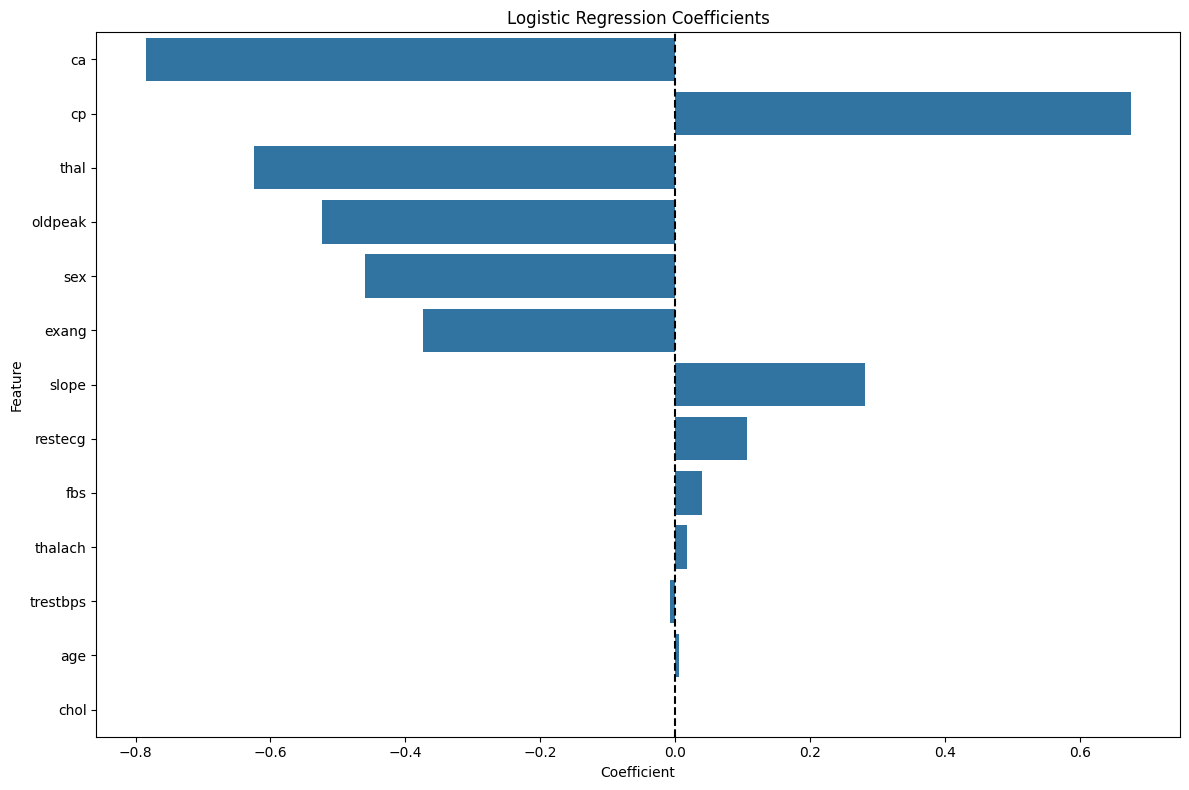

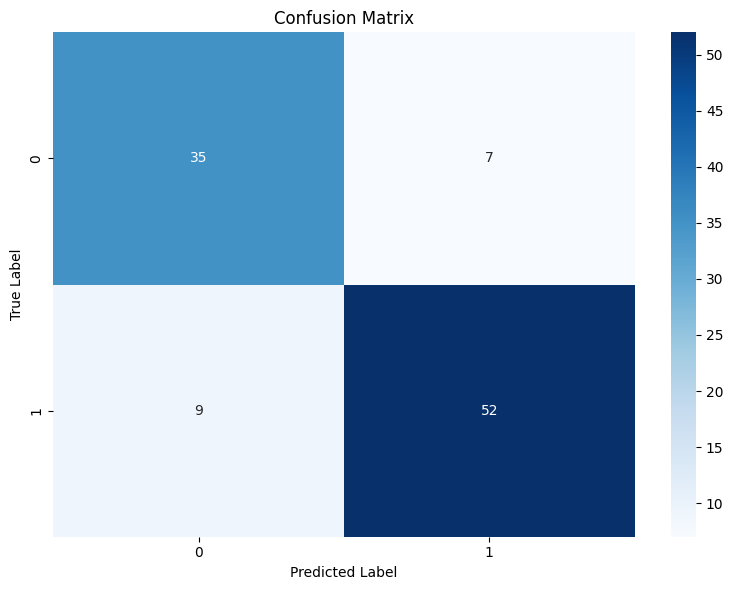

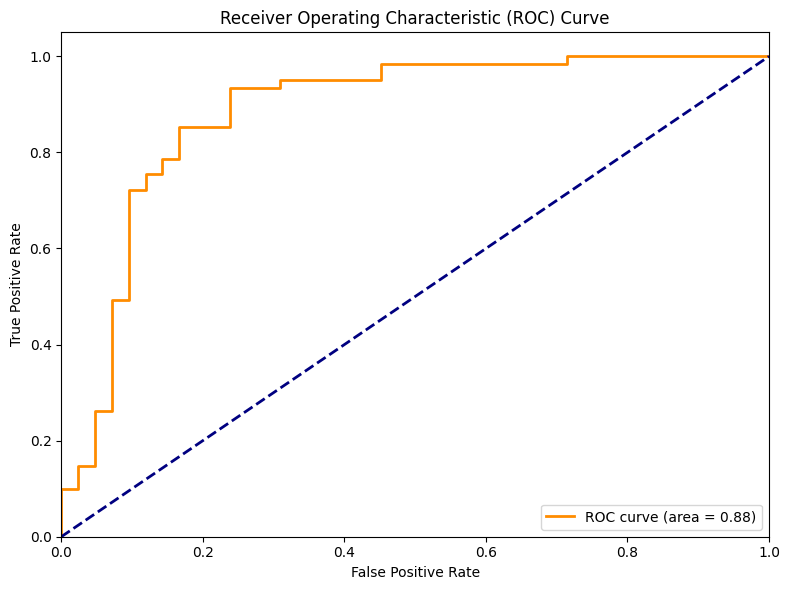

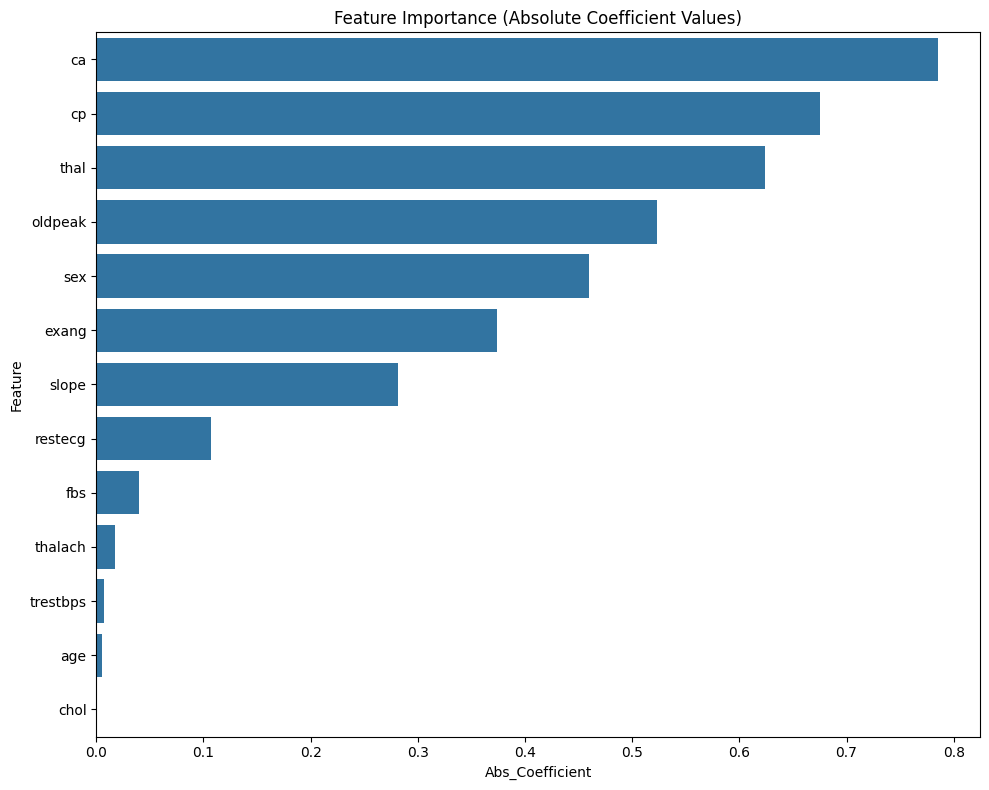

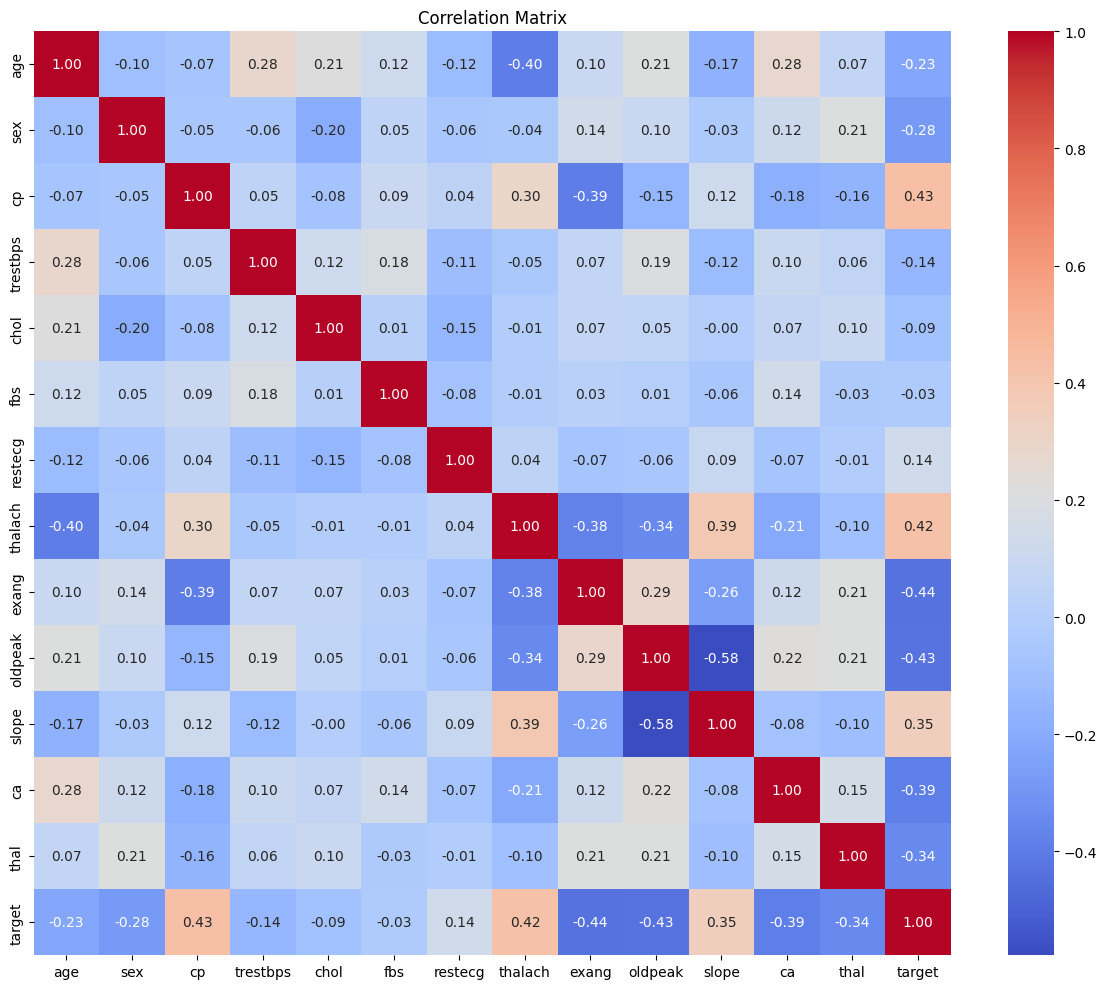

In [3]:
#!/usr/bin/env python3
# Heart Disease Logistic Regression Analysis
# DSC 255 - Module 1 - Assignment 7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import warnings

# Suppress specific convergence warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Load the heart disease dataset
print("Loading heart disease dataset...")
try:
    heart_data = pd.read_csv('heart.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: heart.csv file not found. Please ensure the file is in the current directory.")
    exit(1)

# Display basic information about the dataset
print("\nDataset Information:")
print(f"Number of instances: {heart_data.shape[0]}")
print(f"Number of features: {heart_data.shape[1] - 1}")  # Excluding the target column
print("\nFeature names:")
print(heart_data.columns.tolist())

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(heart_data.head())

# Basic statistics of the dataset
print("\nBasic statistics:")
print(heart_data.describe())

# Check for missing values
print("\nMissing values per column:")
print(heart_data.isnull().sum())

# Step 2: Prepare the data
X = heart_data.iloc[:, :-1]  # Features (all columns except the last one)
y = heart_data.iloc[:, -1]   # Target (last column)

# Step 3: Split the data into training and test sets (200 training, 103 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=200, test_size=103, random_state=42)

print("\nData split:")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Step 4: Fit a logistic regression model to the training data
# Fix for convergence warning: increase max_iter and use 'saga' solver
print("\nFitting logistic regression model...")
logreg = LogisticRegression(
    max_iter=10000,  # Increase max iterations (default is 100)
    solver='saga',   # Alternative solver that may converge better
    tol=1e-5,        # Slightly lower tolerance for convergence
    C=1.0,           # Regularization strength (default)
    random_state=42
)
logreg.fit(X_train, y_train)

# Step 5: Display the coefficients of the model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

# Sort coefficients by absolute value to identify the most influential features
coefficients['Abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("\nModel Coefficients (sorted by absolute value):")
print(coefficients)

# Identify the three most influential features
top_features = coefficients.head(3)
print("\nThree most influential features:")
print(top_features[['Feature', 'Coefficient']])

# Step 6: Calculate the test error
y_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print("\nTest set performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Error: {test_error:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Estimate the error using 5-fold cross-validation on the training set
# Use the same parameters for cross-validation
cv_logreg = LogisticRegression(
    max_iter=10000,
    solver='saga',
    tol=1e-5,
    C=1.0,
    random_state=42
)
cv_scores = cross_val_score(cv_logreg, X_train, y_train, cv=5)
cv_accuracy = np.mean(cv_scores)
cv_error = 1 - cv_accuracy

print("\n5-fold Cross-Validation:")
print(f"CV Accuracy: {cv_accuracy:.4f}")
print(f"CV Error: {cv_error:.4f}")
print(f"Individual fold accuracies: {cv_scores}")

# Compare test error with cross-validation error
print("\nComparison of Errors:")
print(f"Test Error: {test_error:.4f}")
print(f"CV Error: {cv_error:.4f}")
print(f"Difference: {abs(test_error - cv_error):.4f}")

# Step 8: Visualize the results

# Plot the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients')
plt.axvline(x=0, color='k', linestyle='--')
plt.tight_layout()
plt.savefig('logistic_regression_coefficients.png')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')

# Plot ROC curve
from sklearn.metrics import roc_curve, auc
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve.png')

print("\nAnalysis complete. Visualizations saved as PNG files.")

# Additional analysis: Feature importance visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.tight_layout()
plt.savefig('feature_importance.png')

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

print("\nAdditional visualizations saved.")
print("\nNote: The actual values in the LaTeX solutions are based on this specific random seed (42).")
print("Running the script with a different seed may produce slightly different results.")